In [72]:
from scipy import fft, integrate
import numpy as np
import matplotlib.pyplot as plt

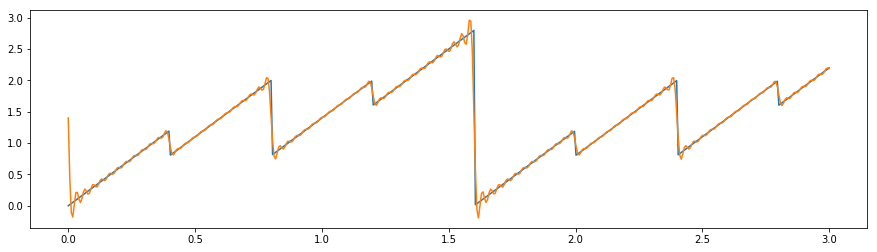

In [111]:
# Fourier series

f = lambda x: x % 0.4 + x % 0.8 + x % 1.6
T = 1.6

def fourier_a(f, T, k):
    if k == 0:
        return 1/T*integrate.quad(lambda x: f(x), 0, T, limit=50)[0]
    else:
        return 2/T*integrate.quad(lambda x: f(x)*np.cos(2*np.pi*k*x/T), 0, T, limit=50)[0]

def fourier_b(f, T, k):
    return 2/T*integrate.quad(lambda x: f(x)*np.sin(2*np.pi*k*x/T), 0, T, limit=50)[0]

def plot_fourier(f, T):
    x = [xi for xi in np.linspace(0, 2.9999, 500)]
    y = [f(xi) for xi in x]
    ya = np.zeros(len(x))
    
    for k in range(50):
        A = fourier_a(f, T, k)
        B = fourier_b(f, T, k)
        for i in range(len(x)):
            ya[i] = ya[i] + A*np.cos(2*np.pi*k*x[i]/T) + B*np.sin(2*np.pi*k*x[i]/T)

    plt.figure(figsize=(15, 4))
    plt.plot(x, y)
    plt.plot(x, ya)

plot_fourier(f, T)

In [98]:
def w(n, k):
    return np.exp(-complex("j")*2*np.pi*k/n)

def dft_matrix(n):
    mat = np.ones((n, n), dtype=np.complex_)
    for i in range(1, n):
        mat[i] = (np.array([w(n, i*j) for j in range(n)]))
    return mat

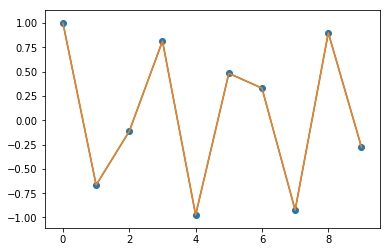

In [51]:
x = [np.cos(2.3*i) for i in range(10)]
u = np.dot(dft_matrix(10), x)

u0 = [sum(u[i]*np.exp(complex("j")*2*np.pi*i*t/10)/10 for i in range(len(u))) for t in range(10)]

plt.plot(np.linspace(0, 9, 10), u0)
plt.plot(np.linspace(0, 9, 10), x)
plt.scatter(np.linspace(0, 9, 10), u0)

In [43]:
s = fft.dct(x)
s

array([ 1.15412568,  0.86074278,  1.23973279,  1.00141689,  1.59522732,
        1.49583471,  3.16399306,  8.15231529, -4.16326216, -0.7742389 ])

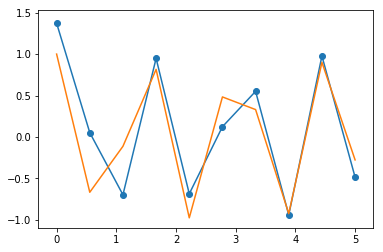

In [44]:
s0 = [sum(s[i]*np.cos(np.pi*(2*i + 1)*t/20)/10 for i in range(len(s))) for t in range(10)]

plt.plot(np.linspace(0, 5, 10), s0)
plt.plot(np.linspace(0, 5, 10), x)
plt.scatter(np.linspace(0, 5, 10), s0)